In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

df = pd.DataFrame()

# データ準備

In [2]:
df['math'] = np.array([100,80,79,77,68,65,63,61,60,59])
df['eng'] = np.array([77,75,69,61,60,59,52,21,21,13])
df

,math,eng
0,100,77
1,80,75
2,79,69
3,77,61
4,68,60
5,65,59
6,63,52
7,61,21
8,60,21
9,59,13


In [5]:
df['math'].describe()

count     10.000000
mean      71.200000
std       12.890996
min       59.000000
25%       61.500000
50%       66.500000
75%       78.500000
max      100.000000
Name: math, dtype: float64

# 箱ひげ図

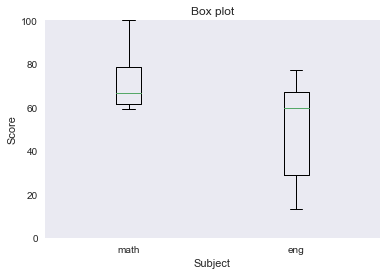

In [137]:
# dfで描画すると簡単
hige = (df['math'], df['eng'])

fig = plt.figure()
ax = fig.add_subplot(111)

# 箱ひげ図をつくる
bp = ax.boxplot(hige)
ax.set_xticklabels(['math', 'eng'])

plt.title('Box plot')
plt.grid()
plt.xlabel('Subject')
plt.ylabel('Score')
plt.title('Box plot')
plt.ylim([0,100])
plt.show()

# 箱ひげの意味

>1 A、B、C、Dの4区間のなかに、それぞれ同じ個数だけデータが入っています。

>> - D：ひげの上端（最大値）から箱の上端（第三四分位）まで
>> - C：箱の上端（第三四分位）から箱の中央の線（中央値）まで
>> - B：箱の中央の線（中央値）から箱の下端（第一四分位）まで
>> - A：箱の下端（第一四分位）からひげの下端（最小値）まで


>2 しかし、同じ個数でもその区間の長さが異なることから、データのばらつき具合を知ることができます。

>3 例えば、区間Bと区間Dでは、区間Bの方が区間が短いことからよりデータが集中していることが分かります。

>4 また、箱の高さ（区間Bと区間Cを合わせたもの）は全データの半分のデータを表すことから、およそ「57」から「78」の範囲に全体の半分のデータが存在することが読み取れます。


In [ ]:
> 図をいれる。

# チェック

>1.A、B、C、Dの4区間のなかに、それぞれ同じ個数だけデータが入っています。

### 中央値算出

In [138]:
m_mean = df['math'].mean()
e_mean = df['eng'].mean()

m_med_2 = df['math'].median()
e_med_2 = df['eng'].median()

m_modal = scipy.stats.mode(df['math'])
e_modal = scipy.stats.mode(df['eng'])

print('ave / math:{0}, eng:{1}'.format(m_mean, e_mean))
print('med / math:{0}, eng:{1}'.format(m_med,e_med))
print('saihan / math:{0}, eng:{1}'.format(m_modal,e_modal))

ave / math:71.2, eng:50.8
med / math:66.5, eng:59.5
saihan / math:ModeResult(mode=array([59]), count=array([1])), eng:ModeResult(mode=array([21]), count=array([2]))


### 四分位数

__math__

In [ ]:
中央値を求める。

In [139]:
m_med_3 = df[df['math'] > m_med_2]['math'].median()
m_med_1 = df[df['math'] < m_med_2]['math'].median()

print('m_med 3 {0}'.format(m_med_3))
print('m_med 2 {0}'.format(m_med_2))
print('m_med 1 {0}'.format(m_med_1))


m_med 3 79.0
m_med 2 66.5
m_med 1 61.0


#### 質問！！！！

In [ ]:
それぞれの区間のデータ数を数える

In [140]:
print("Grp D:%d" % len(df[df['math'] > m_med_3]))
print("Grp C:%d" % (len(df[m_med_3 >= df['math']]) - len(df[m_med_2 >= df['math']])))
print("Grp B:%d" % (len(df[m_med_2 >= df['math']]) - len(df[m_med_1 >= df['math']])))
print("Grp A:%d" % len(df[m_med_1 >= df['math']]))

Grp D:2
Grp C:3
Grp B:2
Grp A:3


__eng__

In [ ]:
中央値を求める。

In [141]:
e_med_3 = df[df['eng'] > e_med_2]['eng'].median()
e_med_1 = df[df['eng'] < e_med_2]['eng'].median()

print('e_med 3 {0}'.format(e_med_3))
print('e_med 2 {0}'.format(e_med_2))
print('e_med 1 {0}'.format(e_med_1))


e_med 3 69.0
e_med 2 59.5
e_med 1 21.0


In [ ]:
それぞれの区間のデータ数を数える

In [142]:
print("Grp D:%d" % len(df[df['eng'] > e_med_3]))
print("Grp C:%d" % (len(df[e_med_3 >= df['eng']]) - len(df[e_med_2 >= df['eng']])))
print("Grp B:%d" % (len(df[e_med_2 >= df['eng']]) - len(df[e_med_1 >= df['eng']])))
print("Grp A:%d" % len(df[e_med_1 >= df['eng']]))

Grp D:2
Grp C:3
Grp B:2
Grp A:3


データ数は区間ごとに同じであることがわかった。それでは次。

>   2.しかし、同じ個数でもその区間の長さが異なることから、データのばらつき具合を知ることができます。

- mathの100点
- engの13点

はひげが伸びあがっていることから、視覚的にわかった。

> 3.例えば、区間Bと区間Dでは、区間Bの方が区間が短いことからよりデータが集中していることが分かります。

> 4.また、箱の高さ（区間Bと区間Cを合わせたもの）は全データの半分のデータを表すことから、およそ「57」から「78」の範囲に全体の半分のデータが存在することが読み取れます。

- mathのB
- engのC

にはデータが集中している。（箱が小さい。）

箱全体で半分のデータがあるということが読み取れるのか。いいね、箱ひげ。

# 参考

In [ ]:
- [4-2. 箱ひげ図の見方](https://bellcurve.jp/statistics/course/5220.html)
- [Pythonで箱ひげ図](http://qiita.com/Yuichi801/items/8ffd9fb6c5ec39e206fc)
- [](https://mathtrain.jp/hakohige)
- [](http://did2memo.net/2017/02/12/how-to-make-hakohigezu/)

# あとがき

In [4]:
df['math'].describe()

count     10.000000
mean      71.200000
std       12.890996
min       59.000000
25%       61.500000
50%       66.500000
75%       78.500000
max      100.000000
Name: math, dtype: float64

In [ ]:
describeのxx%は実はこのパーセンタイルでした。